In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')



In [ ]:

data = load_breast_cancer()
df= pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.columns


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df1=df[df["target"]==1]
df1.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


**Data Visualization**

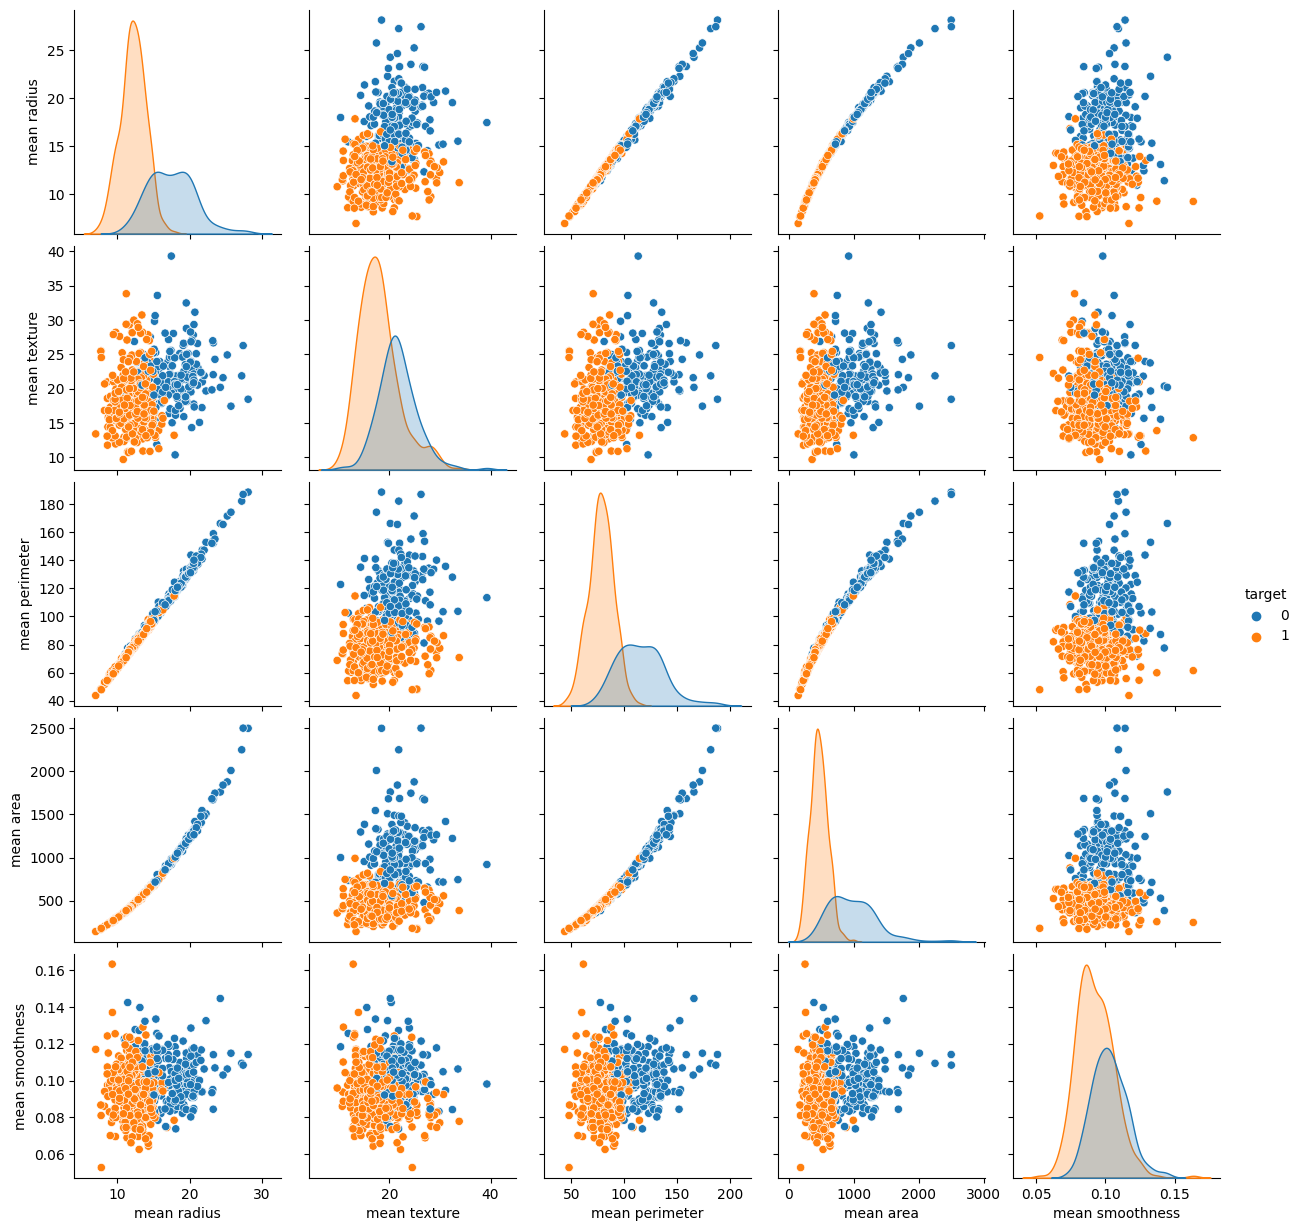

In [ ]:
sns.pairplot(df, hue = 'target',
             vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] )

<Axes: xlabel='target', ylabel='count'>

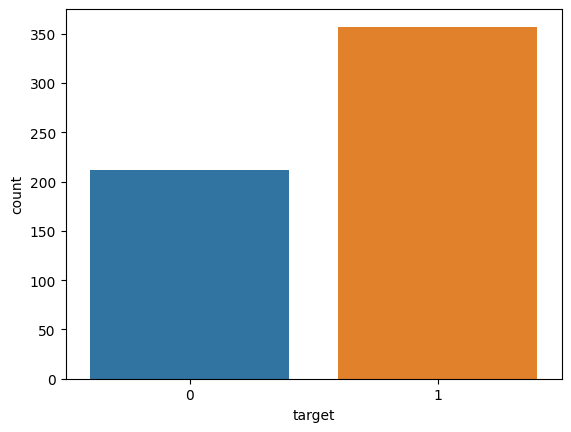

In [ ]:
sns.countplot(x=df['target'])

<Axes: >

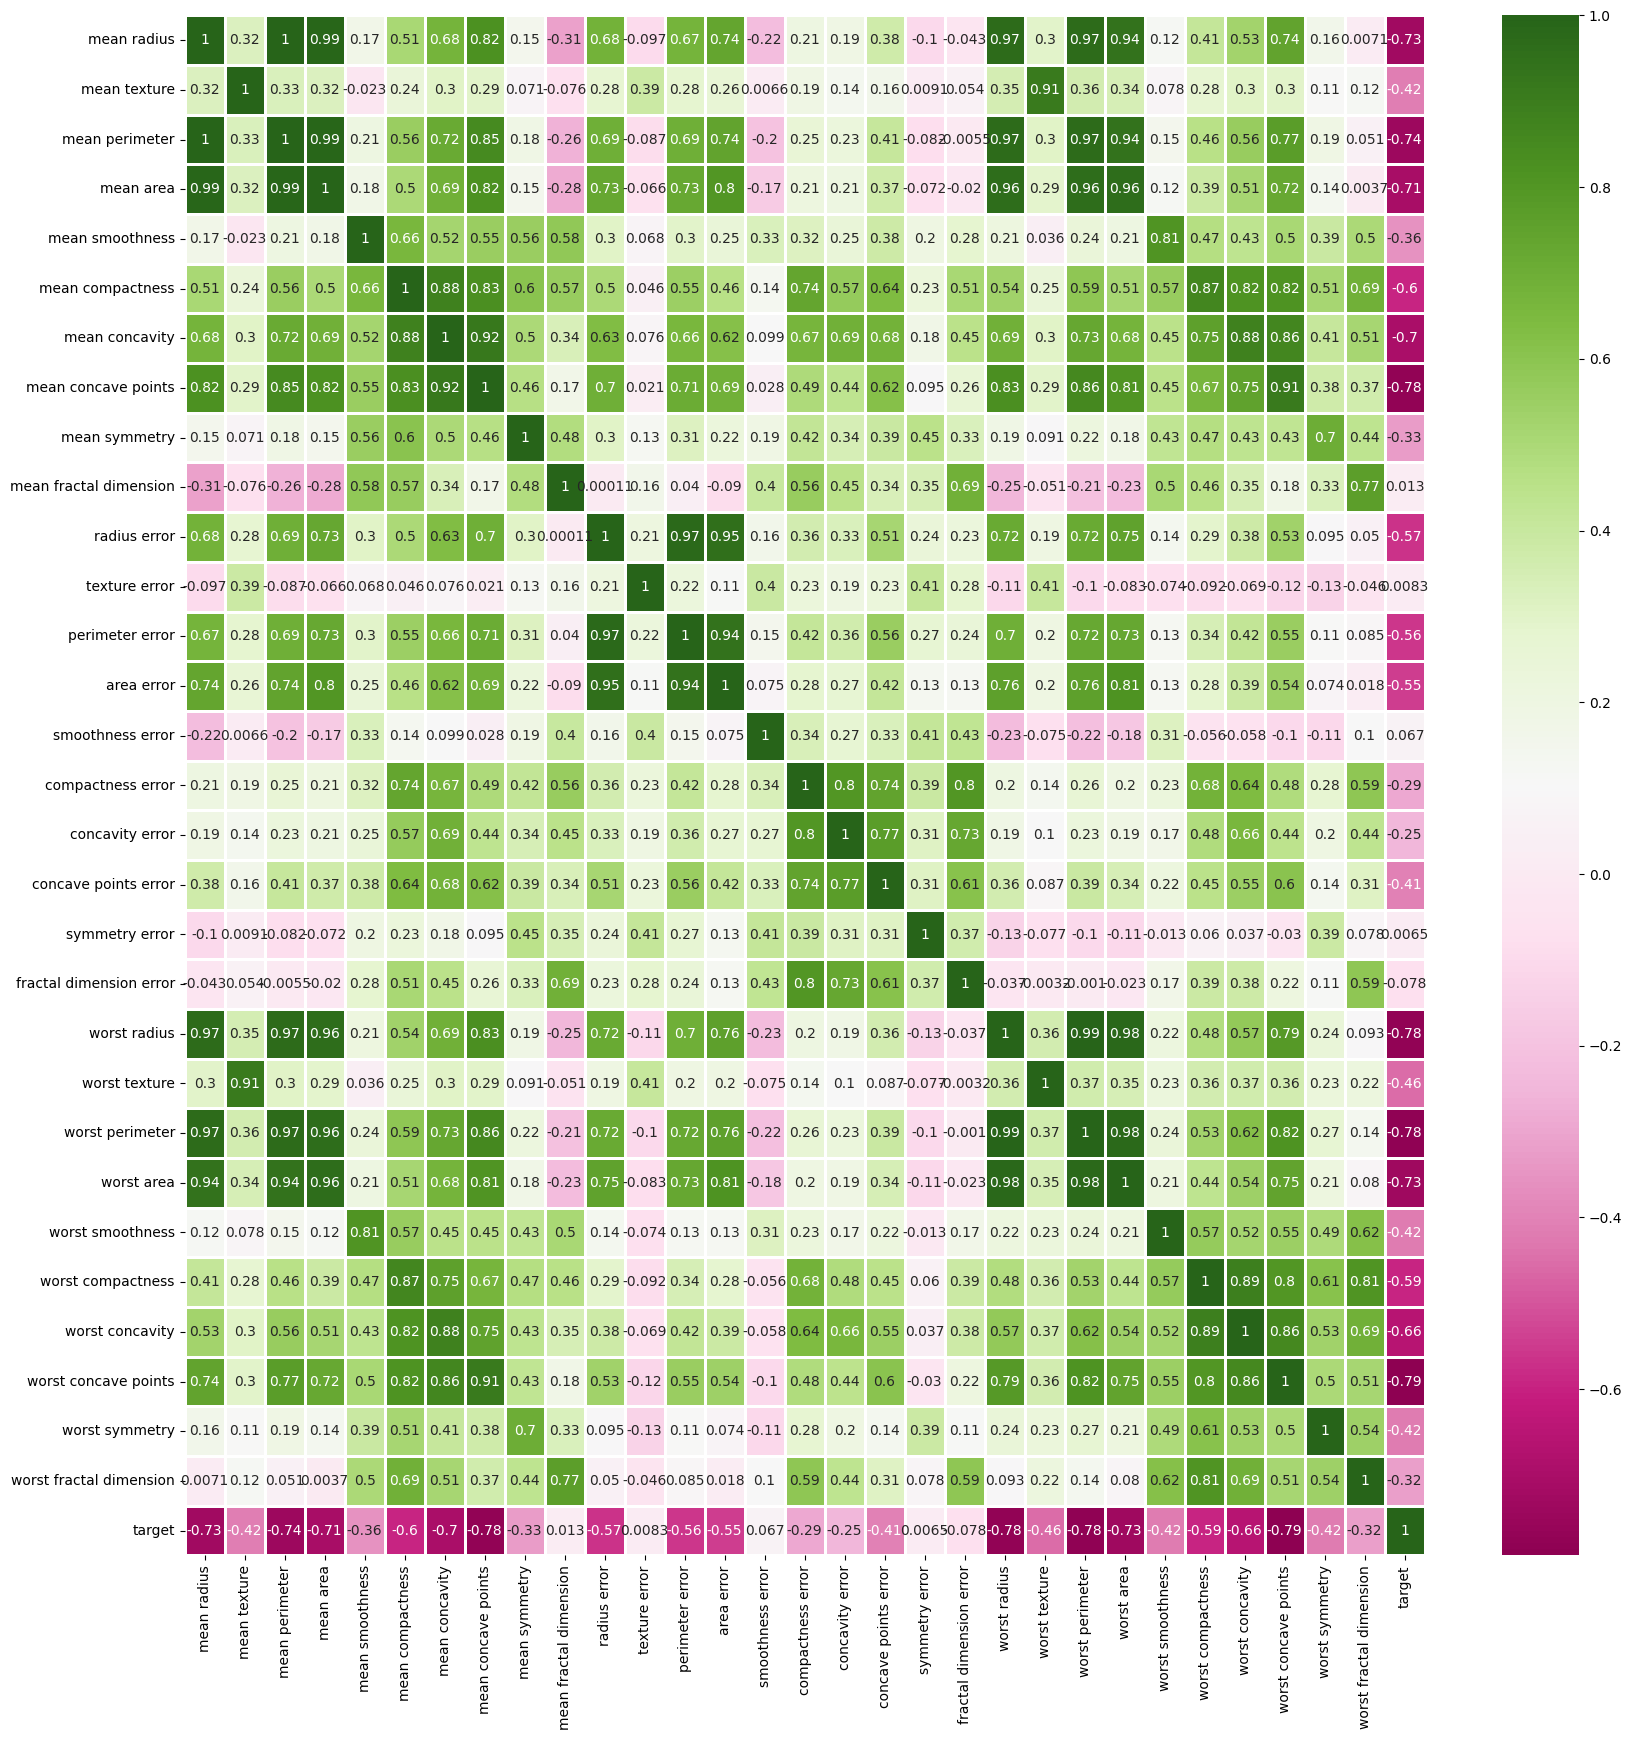

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap ='PiYG', linewidths=2)

In [ ]:
X = df.drop(columns = ['target'],axis=1)
y = df['target']

In [ ]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=45)

In [ ]:
scaler = StandardScaler()

#fit the scal;;er to the train test..it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_scaled = SVC()
svc_scaled.fit(X_train_scaled,y_train)
y_pred_svc = svc_scaled.predict(X_test_scaled)

print(accuracy_score(y_test,y_pred_svc))

0.9736842105263158


In [ ]:
# Randomized Search
params = {'C':[0.1, 1, 10], 'kernel':['linear', 'rbf'], 'gamma':[0.1, 0.01, 0.001]}
random_search = RandomizedSearchCV(svc_scaled, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'rbf']},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 10}

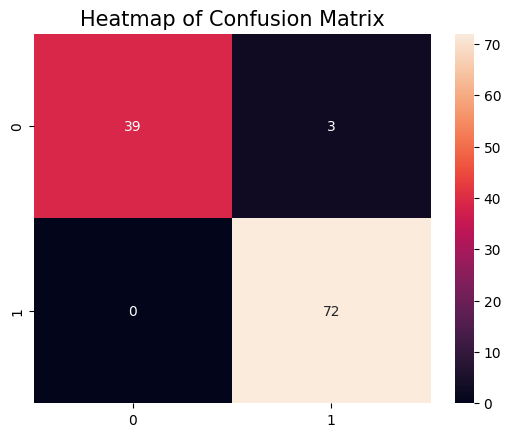

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:

# Define the cross-validation method
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Evaluate the model using cross-validation on the training data
scores = cross_val_score(svc_scaled, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Print the average performance across all folds
print('Mean Accuracy: %.3f' % (scores.mean()))

Mean Accuracy: 0.967


In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



**XGBOOST MODEL**

In [ ]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.9824561403508771

In [ ]:
# Train with Standard scaled Data
xgb_classifier2 = XGBClassifier()
xgb_classifier2.fit(X_train_scaled, y_train)
y_pred_xgb_sc = xgb_classifier2.predict(X_test_scaled)
accuracy_score(y_test, y_pred_xgb_sc)

0.9824561403508771

In [ ]:
# training XGBoost classifier with best parameters
xgb_classifier_pt = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

xgb_classifier_pt.fit(X_train, y_train)
y_pred_xgb_pt = xgb_classifier_pt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_xgb_pt)

0.9736842105263158

In [ ]:
## Pickle
import pickle

# save model
pickle.dump(xgb_classifier_pt, open('breast_cancer_detector_3.pickle', 'wb'))

# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector_3.pickle', 'rb'))

# predict the output
y_pred = breast_cancer_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of XGBoost model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of XGBoost model = ',accuracy_score(y_test, y_pred))

Confusion matrix of XGBoost model: 
 [[40  2]
 [ 1 71]] 

Accuracy of XGBoost model =  0.9736842105263158


In [ ]:

# load the saved model
with open('breast_cancer_detector_3.pickle', 'rb') as f:
    model = pickle.load(f)

features_name = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

def predict(input_features):
    features_value = [np.array(input_features)]
    features_value = np.reshape(features_value, (len(features_value), -1))
    df = pd.DataFrame(features_value, columns=features_name)
    output = model.predict(df)

    if output == 0:
        res_val= "* breast cancer *"
    else:
        res_val= "no breast cancer"

    return res_val

# test the predict function
# input_features = [17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]
input_features=[12.46, 24.04, 83.97, 475.9, 0.1186, 0.2396, 0.2273, 0.08543, 0.2030, 0.06204, 0.4467, 1.2140, 3.0880, 27.28, 0.007507, 0.03349, 0.04562, 0.01721, 0.02729, 0.004067, 13.16, 33.34, 86.65, 546.7, 0.1271, 0.3000, 0.3297, 0.09981, 0.2950, 0.07021]
result = predict(input_features)
print(result)

no breast cancer
